## Exploratory Data Analysis

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
print("현재 작업 경로: ", os.getcwd())
os.chdir("/content/drive/MyDrive")
print("변경된 작업 경로: ", os.getcwd())

현재 작업 경로:  /content
변경된 작업 경로:  /content/drive/MyDrive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS Project 2024/week02/data/diabetes.csv")
df.shape

(768, 9)

In [ ]:
# 위에서 5개만 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 결측치를 봅니다.

df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
# 결측치 합계

df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# 수치데이터에 대한 요약을 봅니다.

df.describe()

## 1사분위(25%) 2사분위(50%) 3사분위(75%)
## 평균값이 중위값보다 높음 -> 최댓값이 크기 때문에 평균값이 중위값보다 높게 나옴
## glucose -> 1사분위 수가 99인데 최소값이 0 -> 결측치, 혈압도 0이 나올 수 없으므로 결측치, 피부 주름도 0이 나올 수 없음, bmi도

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_columns 라는 변수에 담아줍니다.

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다.

0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다.

따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

In [ ]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

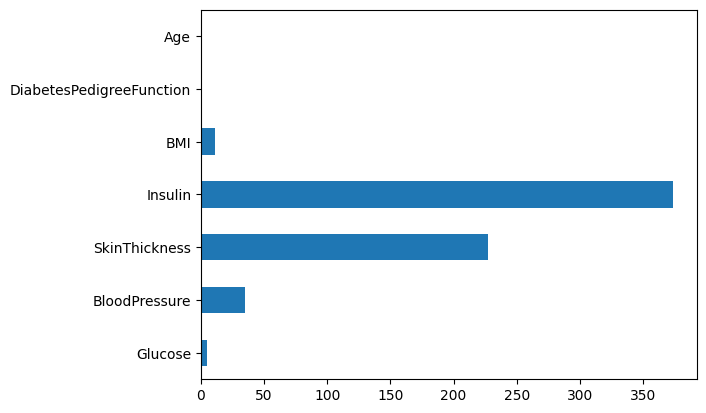

In [ ]:
# 결측치의 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

<Axes: >

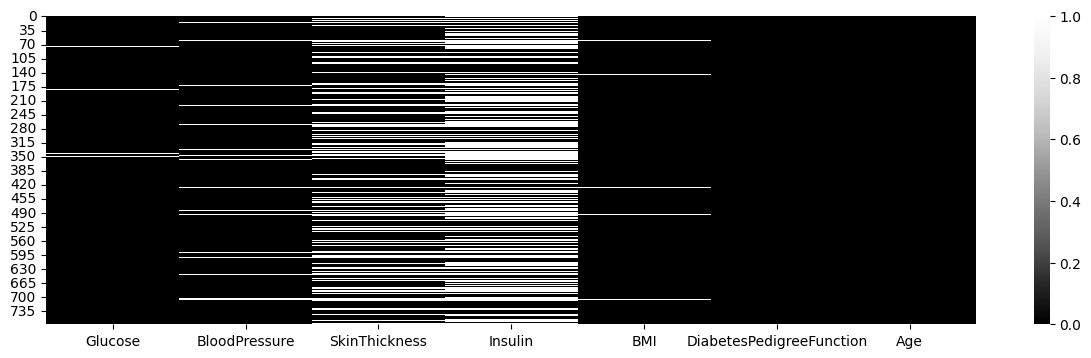

In [ ]:
# 결측치를 heatmap 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")  # camp 색상 변경, Greys_r : 결측치만 하얗게 반전

## 정답값
* target, label 이라고 부르기도 합니다.

In [ ]:
# 정답값인 Outcome 의 갯수를 봅니다.

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# 정답값인 Outcome 의 비율을 봅니다.

df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
# "Pregnancies"를 groupby 로 그룹화 해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.

#df_po = df.groupby(["Pregnancies"])["Outcome"].mean()
#df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])  # count는 빈도수, 여러 개의 연산은 agg 리스트 형태로 작성
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()  # 임신 횟수 값을 column 값으로 변경하고 새롭게 인덱스 추가
df_po

## 임신 횟수가 늘어날수록 당뇨병 발병 비율이 높아짐

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

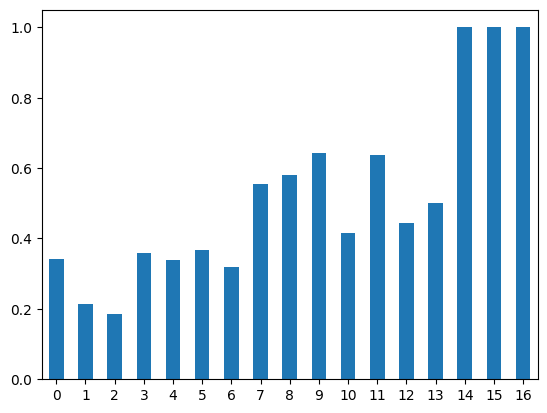

In [ ]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot.bar(rot=0)  # rot는 글씨 각도

## countplot

<Axes: xlabel='Outcome', ylabel='count'>

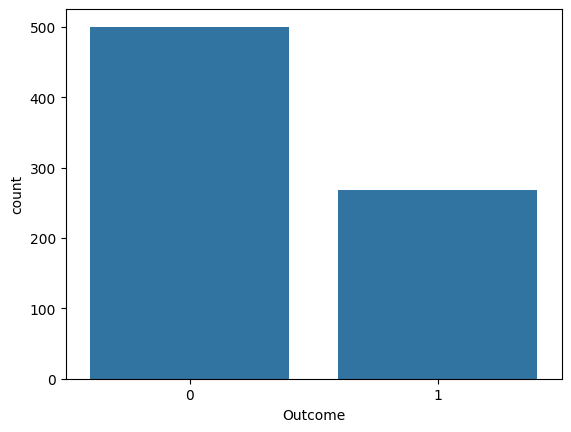

In [ ]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교 합니다.

sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

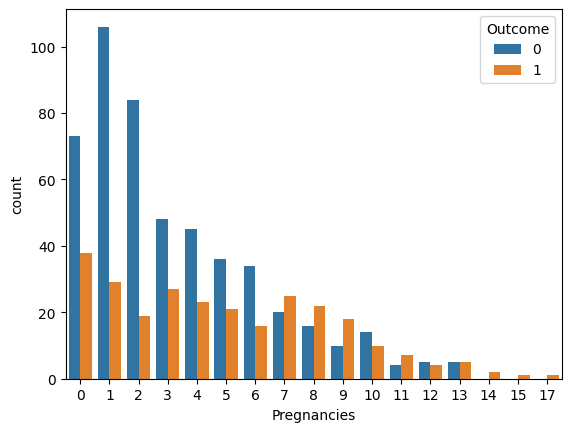

In [ ]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.
# sns.countplot(data=df, x="Pregnancies")
sns.countplot(data=df, x="Pregnancies", hue="Outcome")  # hue(색상) 다른 색상으로 표시

## 임신 횟수가 7번을 넘어가면 발병 횟수가 증가함
## Decision Tree로 그렸을 때 오버피팅 발생 가능성 있음 -> case가 적은데 조건이 (범위 넓음) 많은 경우

In [ ]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()  # 여러 개의 열을 가져올 경우 리스트 형태로 넣어주기

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

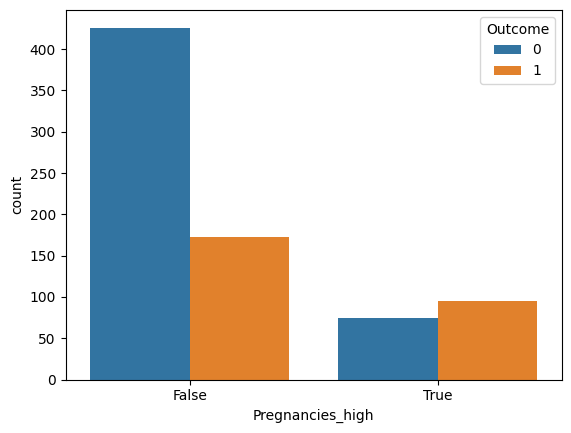

In [ ]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고
# Outcome 값에 따라 다른 색상으로 표현합니다.

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

# 임신 횟수가 7번 미만인 경우 발병하지 않을 확률이 높고, 7번 이상인 경우 발병할 확률이 높음

## barplot
* 기본 설정으로 시각화 하면 y축에는 평균을 추정해서 그리게 됩니다.

<Axes: xlabel='Outcome', ylabel='BMI'>

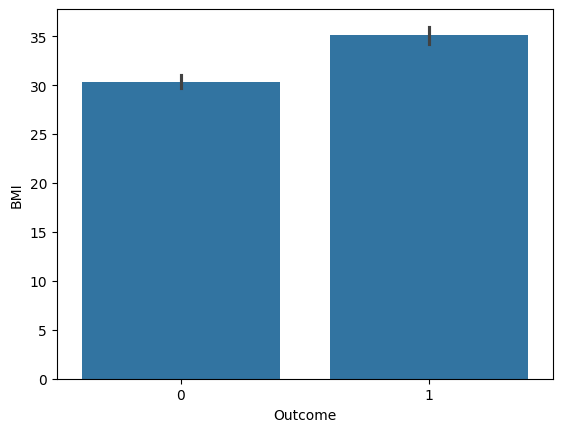

In [ ]:
# 당뇨병 발병에 따른 BMI 수치를 비교합니다.
# 괄호 안에서 shift+tab 키 누르면 사용법 확인 가능

sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

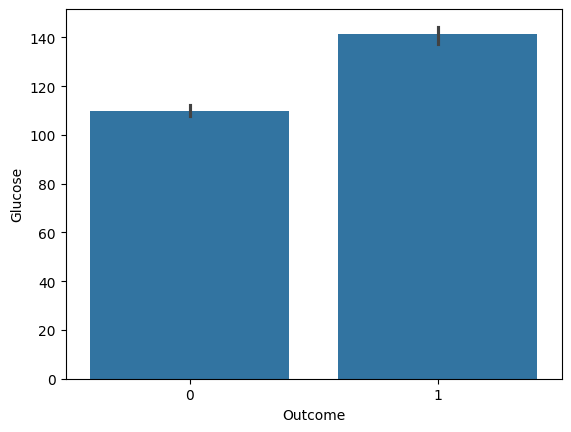

In [ ]:
# 당뇨병 발병에 따른 포도당(Glucose)수치를 비교합니다.

sns.barplot(data=df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

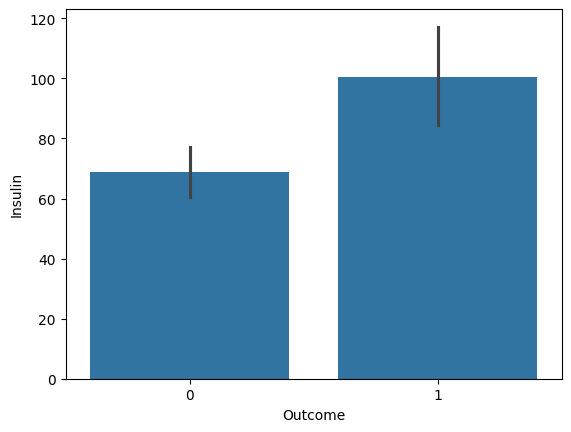

In [ ]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교합니다.
# 범주형 데이터 표현

sns.barplot(data=df, x="Outcome", y="Insulin")

# 검은 색 막대 - 신뢰 구간의 범위
## 차이가 많이 나고 있음

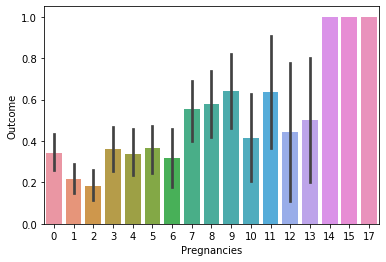

In [ ]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교합니다.

sns.barplot(data=df, x="Pregnancies", y="Outcome")

## 임신 횟수에 따른 outcome의 비율

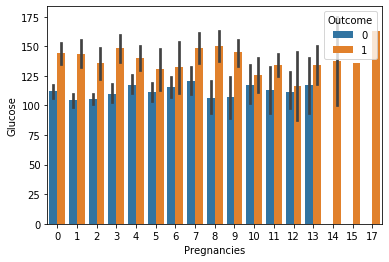

In [ ]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose)수치를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

## outcome에 따른 글루코스 수치

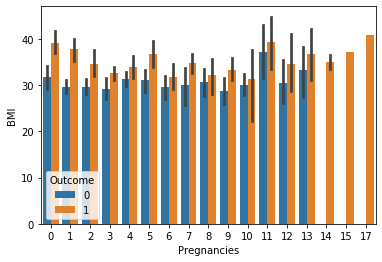

In [ ]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

## bmi 수치는 당뇨별 발병 환자들이 더 높음

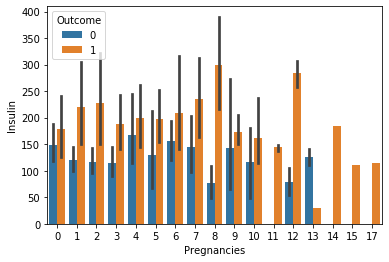

In [ ]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.barplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

## 평균값을 y축에 그리고 있으며, 신뢰구간의 차이가 크게 나는 것을 확인 가능
## 인슐린이 0인 건 결측치일 것
## 발병하는 사람들이 인슐린의 신뢰 구간 차이가 크고 발병하지 않는 경우 인슐린의 수치가 확연히 낮음

## boxplot

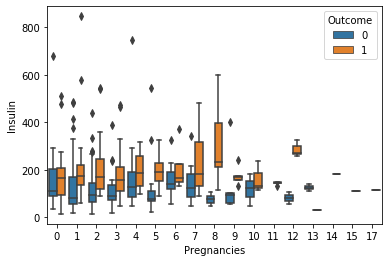

In [ ]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.boxplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

## 1사분위와 3사분위 값의 범위 -> 큼
## 최솟값 최댓값 차이도 큼
## boxplot이 주저앉아 있는 이유는 0인 값이 많기 때문 -> 0보다 큰 값만 그리면 올라옴

## 당뇨병 발병하는 사람들이 대체로 인슐린 수치가 높고 임신 횟수가 늘어날수록 수치의 차이가 큼

## violinplot

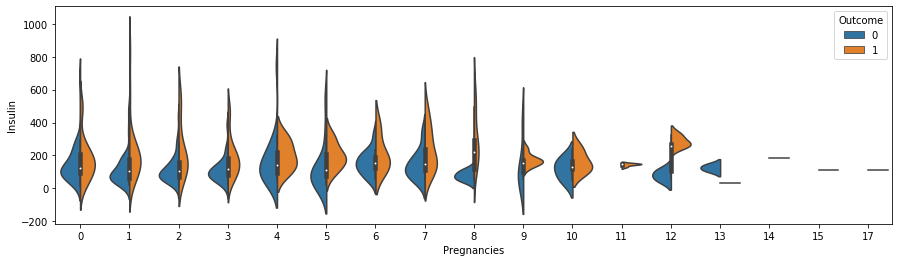

In [ ]:
# 위의 그래프를 violinplot 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome", split=True)  # split=True 옵션은 그래프를 반으로 쪼개서 그림, boxplot을 좀 더 자세히 표현한 형태

# boxplot의 단점을 보완 -> 안에 있는 그래프의 분포를 확인하기 쉽지 않음

## swarmplot

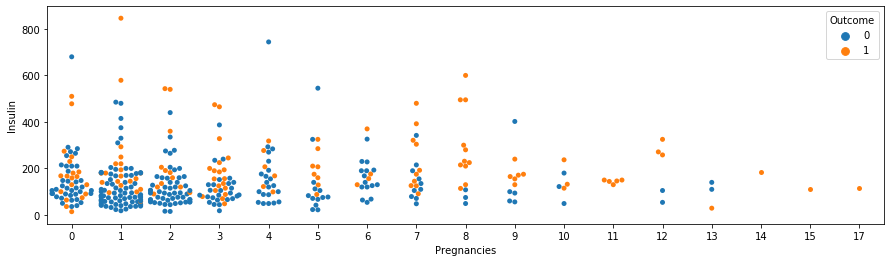

In [ ]:
# 위의 그래프를 swarmplot 으로 시각화 합니다.

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

## 임신 횟수는 당뇨 발병에 영향을 미친다는 것을 알 수 있음
## 이런 수치들이 당뇨 발병을 예측하는 데 도움이 된다

## distplot

In [ ]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

## 연속된 수치화 데이터 표현

((500, 10), (268, 10))

<ipython-input-37-3c5eeb96bbf1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
<ipython-input-37-3c5eeb96bbf1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

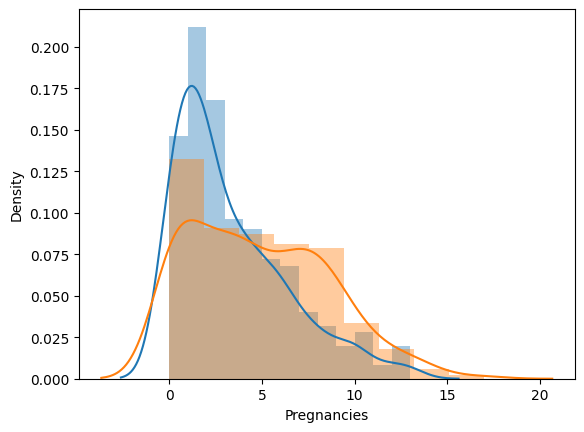

In [ ]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

## 5를 기준으로 이전에는 발병X, 발병O인 경우가 많음

In [ ]:
# 나이에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.distplot(df_0["Age"], hist=False, rug=True, label=0)  # hist=False 옵션은 선만 그림, rug=True 옵션은 밑에 카페트 같은 거 그림, label 값도 지정
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

## 30세 이전에는 발병X, 30대 이후에는 발병O

NameError: name 'sns' is not defined

## Subplots

### Pandas 를 통한 histplot 그리기
* pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.

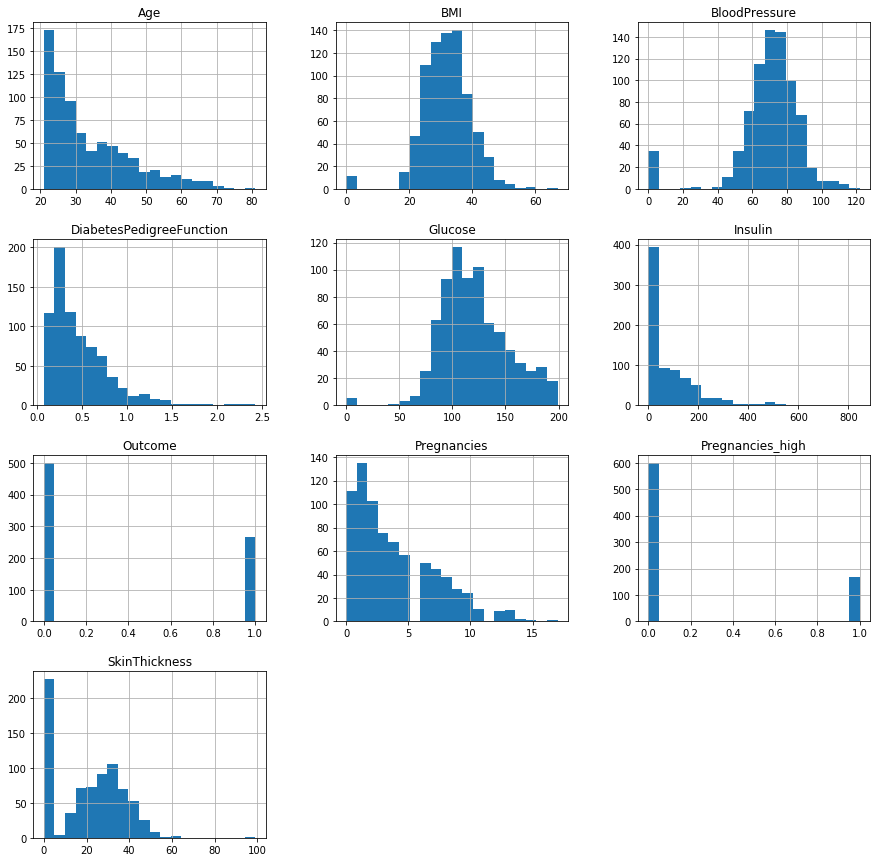

In [ ]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)  # 히스토그램 그리기, bins 옵션은 막대의 개수

### 반복문을 통한 서브플롯 그리기
#### distplot

In [ ]:
# 컬럼의 수만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.
col_num = df.columns.shape  # column의 개수
col_num

(10,)

In [ ]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<ipython-input-40-3abccbeda123>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-40-3abccbeda123>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-40-3abccbeda123>:10: UserWarning: 

`distplot` is a

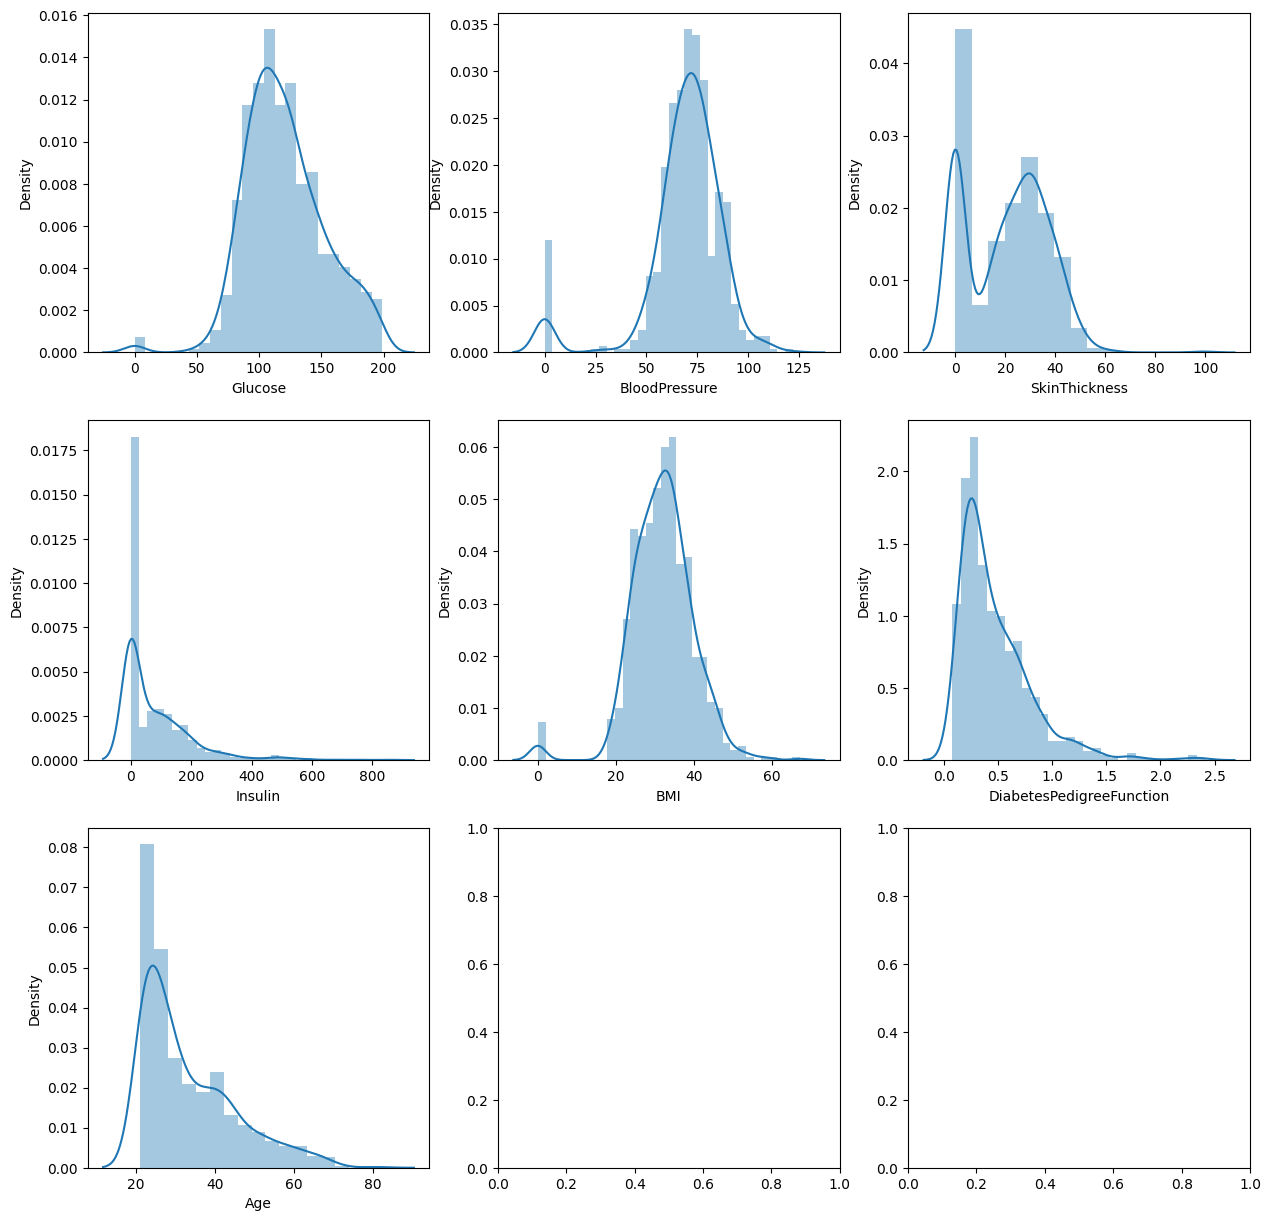

In [ ]:
# distplot 으로 서브플롯을 그립니다.

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

#sns.distplot(df["Outcome"], ax=axes[1][1])  # 하나 그리기, ax 옵션으로 원하는 곳에 그리기

for i, col_name in enumerate(cols):  # enumerate로 순회하면 column 값을 가지고 옴
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

In [ ]:
df_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
1,1,85,66,29,0,26.6,0.351,31,0,False
3,1,89,66,23,94,28.1,0.167,21,0,False
5,5,116,74,0,0,25.6,0.201,30,0,False
7,10,115,0,0,0,35.3,0.134,29,0,True
10,4,110,92,0,0,37.6,0.191,30,0,False
...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,True
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False


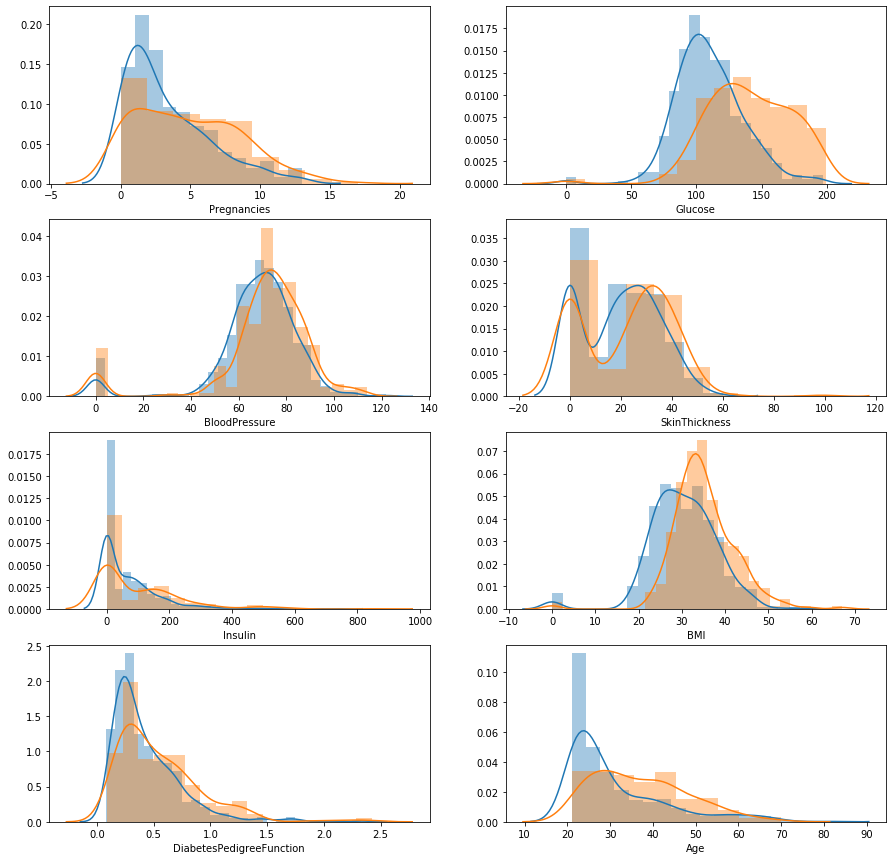

In [ ]:
# 모든 변수에 대한 distplot을 그려 봅니다.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):  # Outcome 값을 빼고 그림
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

#### violinplot

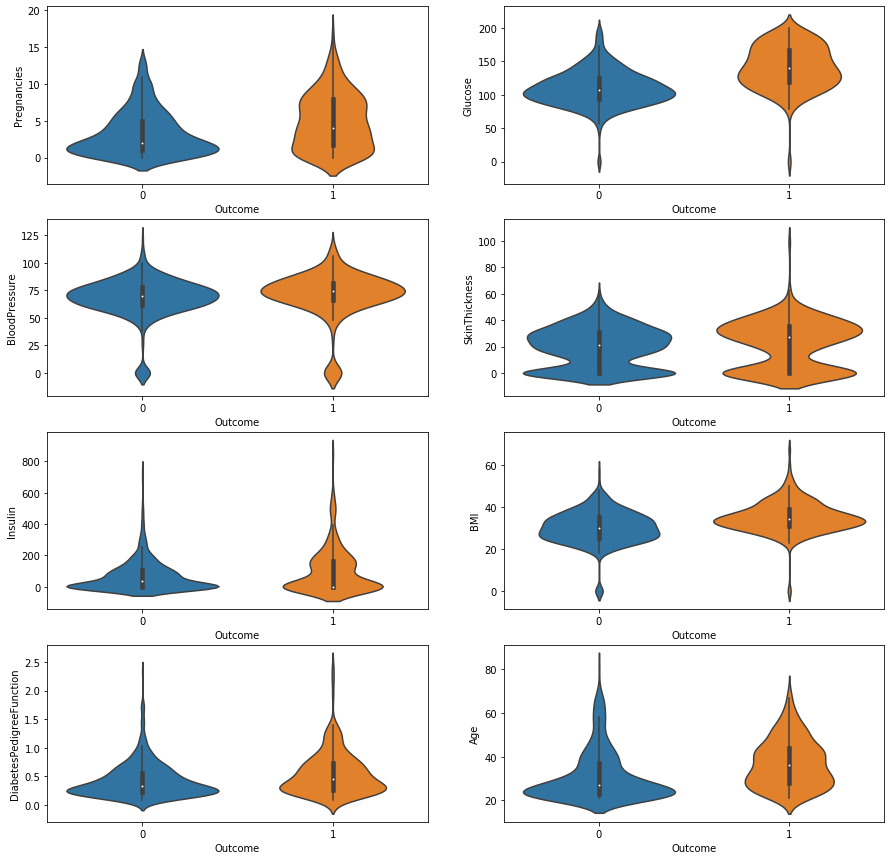

In [ ]:
# violinplot 으로 서브플롯을 그려봅니다.


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

#### lmplot

* 상관계수가 높은 두 변수에 대해 시각화 합니다.

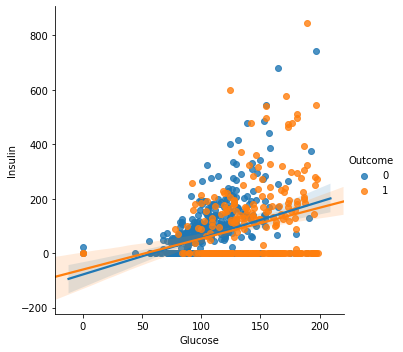

In [ ]:
# Glucose 와 Insulin 을 Outcome 으로 구분해 봅니다.

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

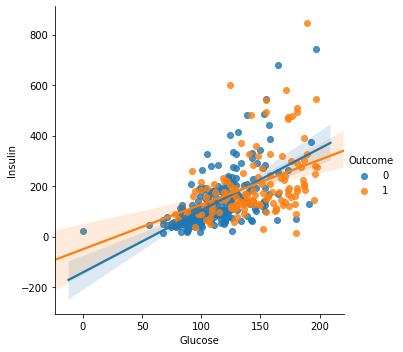

In [ ]:
# Insulin 수치가 0 이상인 데이터로만 그려봅니다.

sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

#### pairplot

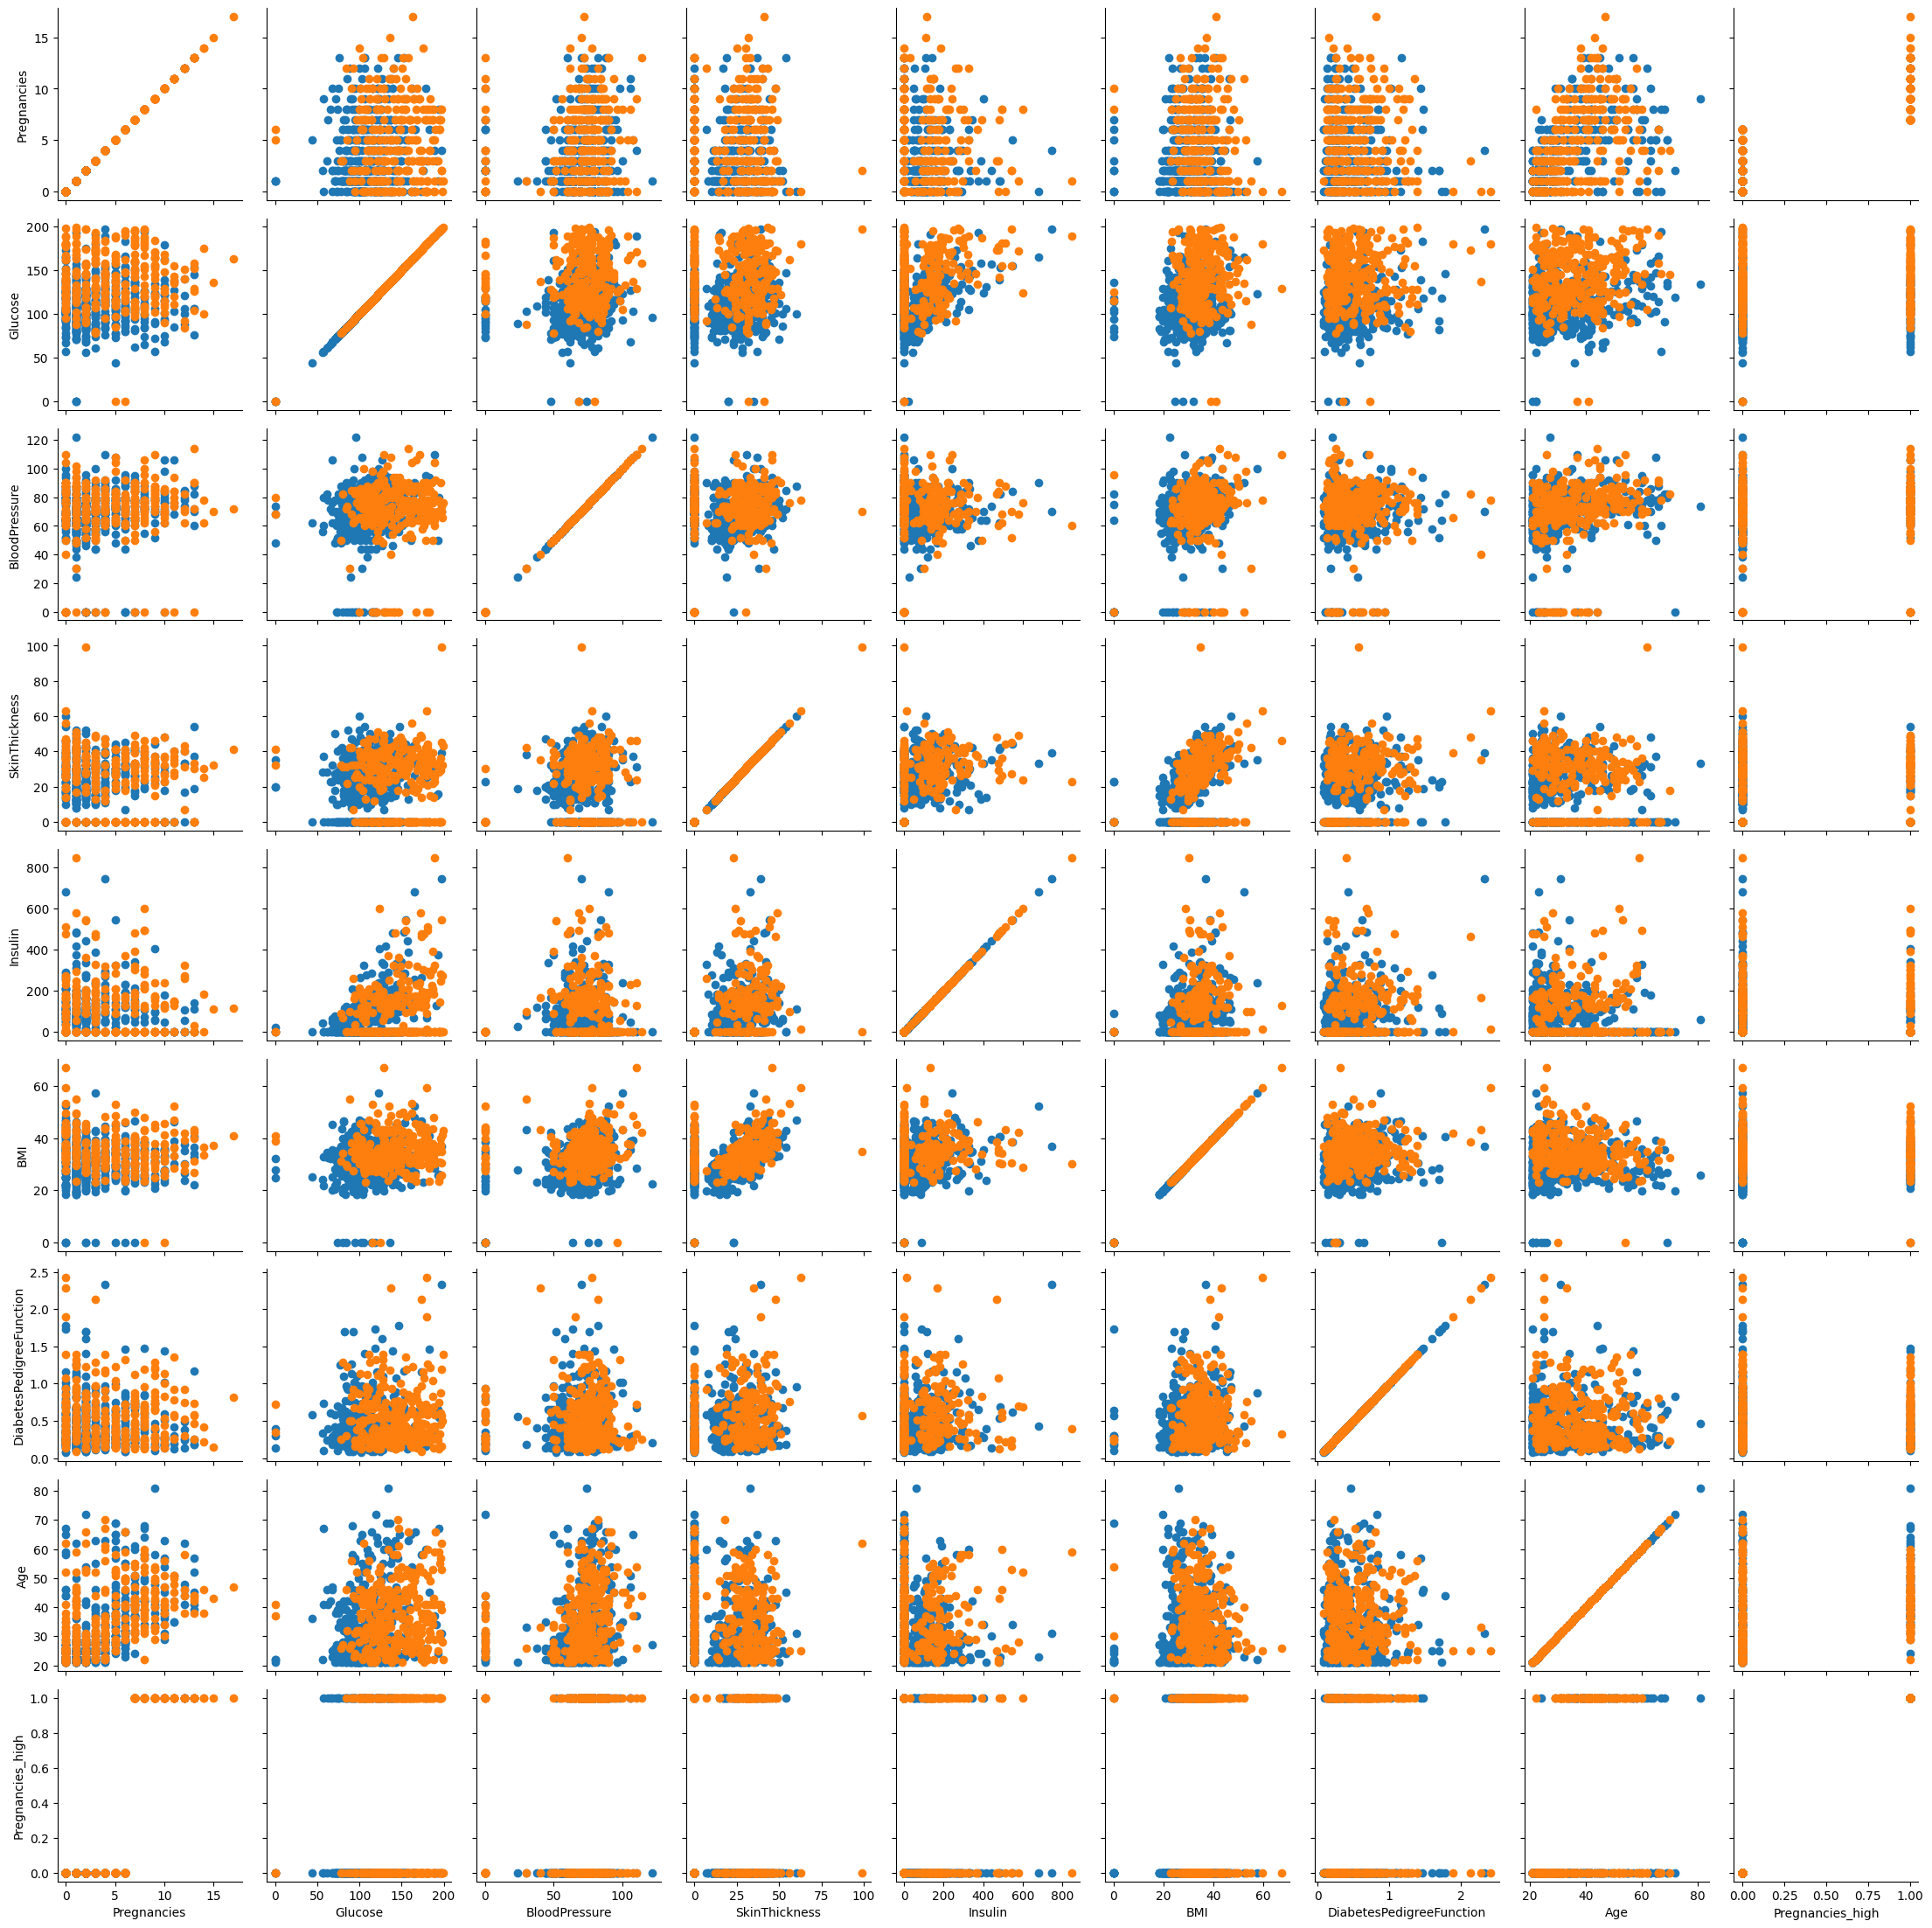

In [ ]:
# PairGrid 를 통해 모든 변수에 대해 Outcome 에 따른 scatterplot을 그려봅니다.
# sns.pairpoot(df, kind="reg")  # 모든 수치에 대해서 그림, kind를 통해 다른 그래프를 그릴 수 있음

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

## 대각선에 있는 건 자기 자신의 값
## 변수 간의 상관관계를 더 쉽게 파악할 수 있음

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)


```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [ ]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# 결측치 없이
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


In [ ]:
#df.iloc[:,:-2]  # age까지만 가져옴
df_matrix = df.iloc[:,:-2].replace(0, np.nan)  # 0 값을 결측치로 만들어줌
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()  # 결측치 처리가 된 Outcome 값을 볼 수 있음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# 정답 값인 Outcome을 제외 하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들어 줍니다.
# 상관계수를 구합니다.

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

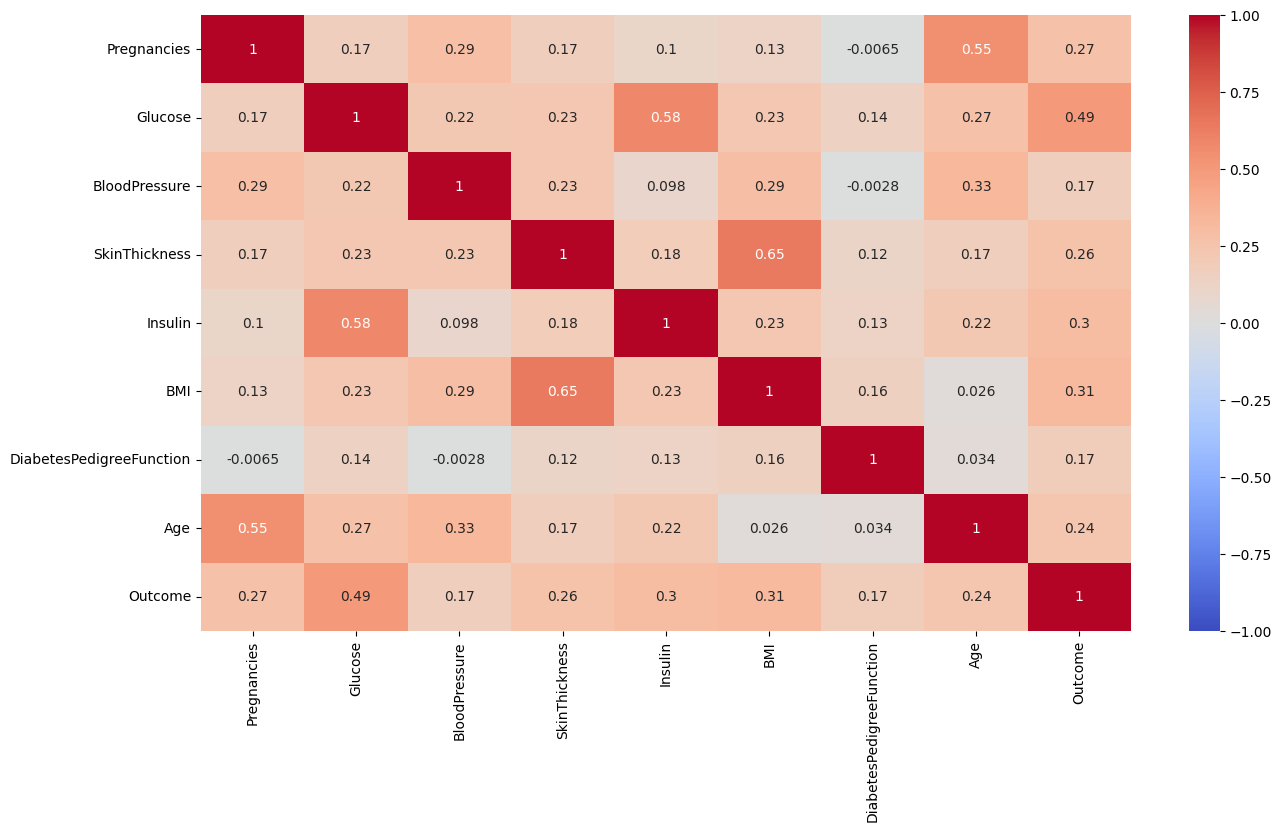

In [ ]:
# 위에서 구한 상관계수를 heatmap으로 시각화 합니다.
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")  # 최댓값 1, 최솟값 -1, cmap 옵션을 통해 컬러 설정 가능, annot 옵션을 통해 상관 계수 숫자 표시

# 1에 가까울수록 밝은 값(자기 자신)
## 숫자가 클수록 상관 관계가 높음 -> 글루코스와 outcome 등

## 결측치 처리 후 -> 인슐리과 outcome의 상관관계가 높아짐

In [ ]:
#  Outcome 수치에 대한 상관계수만 모아서 봅니다.

df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

<Axes: xlabel='Insulin', ylabel='Glucose'>

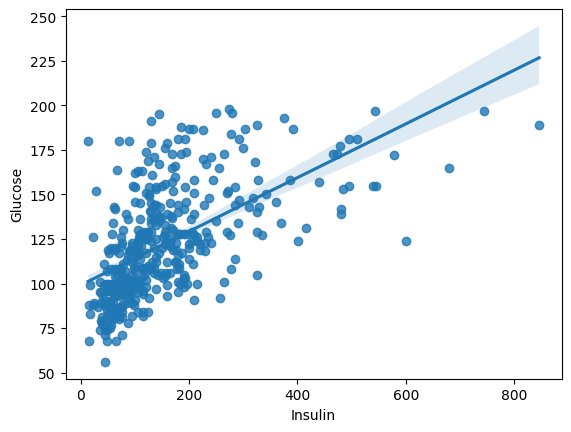

In [ ]:
# Insulin 과 Glucose 로 regplot 그리기
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")
#sns.regplot(data=df, x="Insulin", y="Glucose")  # 0이 있어 matrix가 더 정확

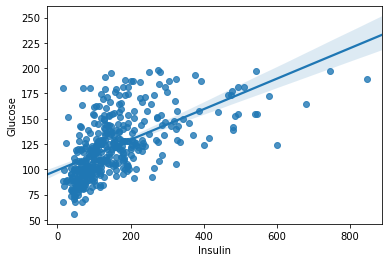

In [ ]:
# df_0 으로 결측치 처리한 데이터프레임으로
# Insulin 과 Glucose 로 regplot 그리기

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

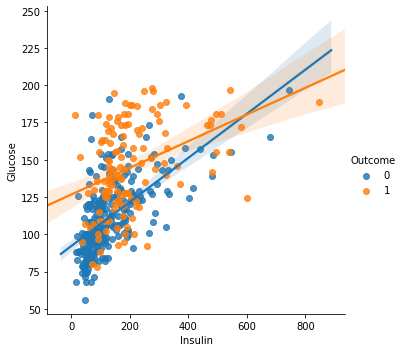

In [ ]:
sns.lmplot(data=df_matrix, x="Insulin", y="Glucose", hue="Outcome")  # 색을 다르게 하기 위해선 lmplot을 사용해야 함, hue 지원X

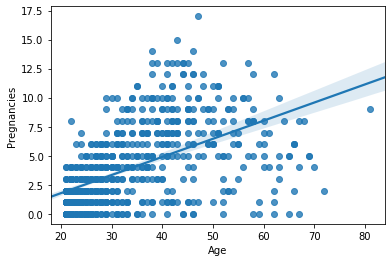

In [ ]:
# Age 와 Pregnancies 로 regplot 그리기

sns.regplot(data=df, x="Age", y="Pregnancies")

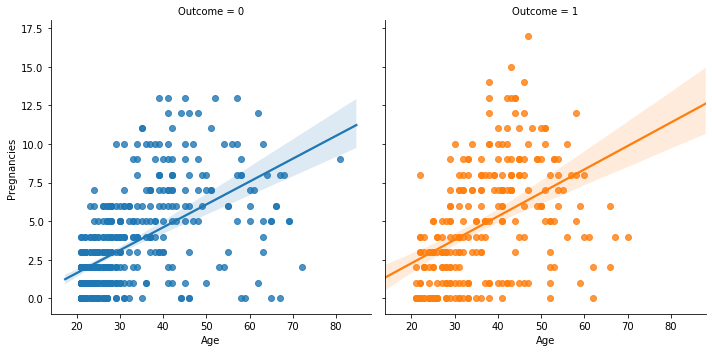

In [ ]:
# Age 와 Pregnancies 로 lmplot 을 그리고 Outcome 에 따라 다른 색상으로 표현하기
# sns.lmplt(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")  # Outcome 값에 따라 시각화를 다르게 해볼 수 있음
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")

In [ ]:
# 결측치가 많은 인슐린 처리, 시각화 했을 때 아웃라이어 값을 어떻게 처리할지 고민해볼 것!